# Three-dimensional perspective map using [PyGMT](https://www.pygmt.org/latest/)

Please consult [Earth Inversion](https://www.earthinversion.com/utilities/Three-dimensional-perspective-map-of-Taiwan-using-GMT-and-PyGMT/ "3D perspective map") where the idea of this 3D perspective plot originated.

In [54]:
import pygmt

In [55]:
# Set region of interest
minlon, maxlon = 24.5, 28.5
minlat, maxlat = 36.6, 39.6

In [56]:
# Load sample earth relief data
grid = pygmt.datasets.load_earth_relief(resolution="03s", region=[minlon, maxlon, minlat, maxlat])

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): N36E024


In [70]:
frame =  ["xa1f0.25","ya1f0.25", "z2000+lmeters", "WSenZ"]

pygmt.makecpt(
        cmap='topo',
        #series=f'-2000/4000/10',
        series=f'-2000/4000/100',
        continuous=True
    )
fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    region=[minlon, maxlon, minlat, maxlat, -2000, 4000],
    perspective=[220, 30],
    frame=frame,
    projection="M15c",
    zsize="2c",
    surftype="i",
    plane="-2000+gazure",
    shading=0,
    # Set the contour pen thickness to "1p"
    contourpen="1p",
)
fig.basemap(
    perspective=True,
    rose="jTL+w3c+l+o1/0" #map directional rose at the top left corner 
    #frame="+tTopography\bAegean\bSea"
)

fig.colorbar(perspective=True, frame=["a1000", "x+lElevation", "y+lm"], truncate=[-2000,3000])

makecpt [WARNING]: Mixing old CPT master tables with HINGE = <value> in D:/GMT5/share/cpt/topo.cpt.  Interpreted as HARD_HINGE.


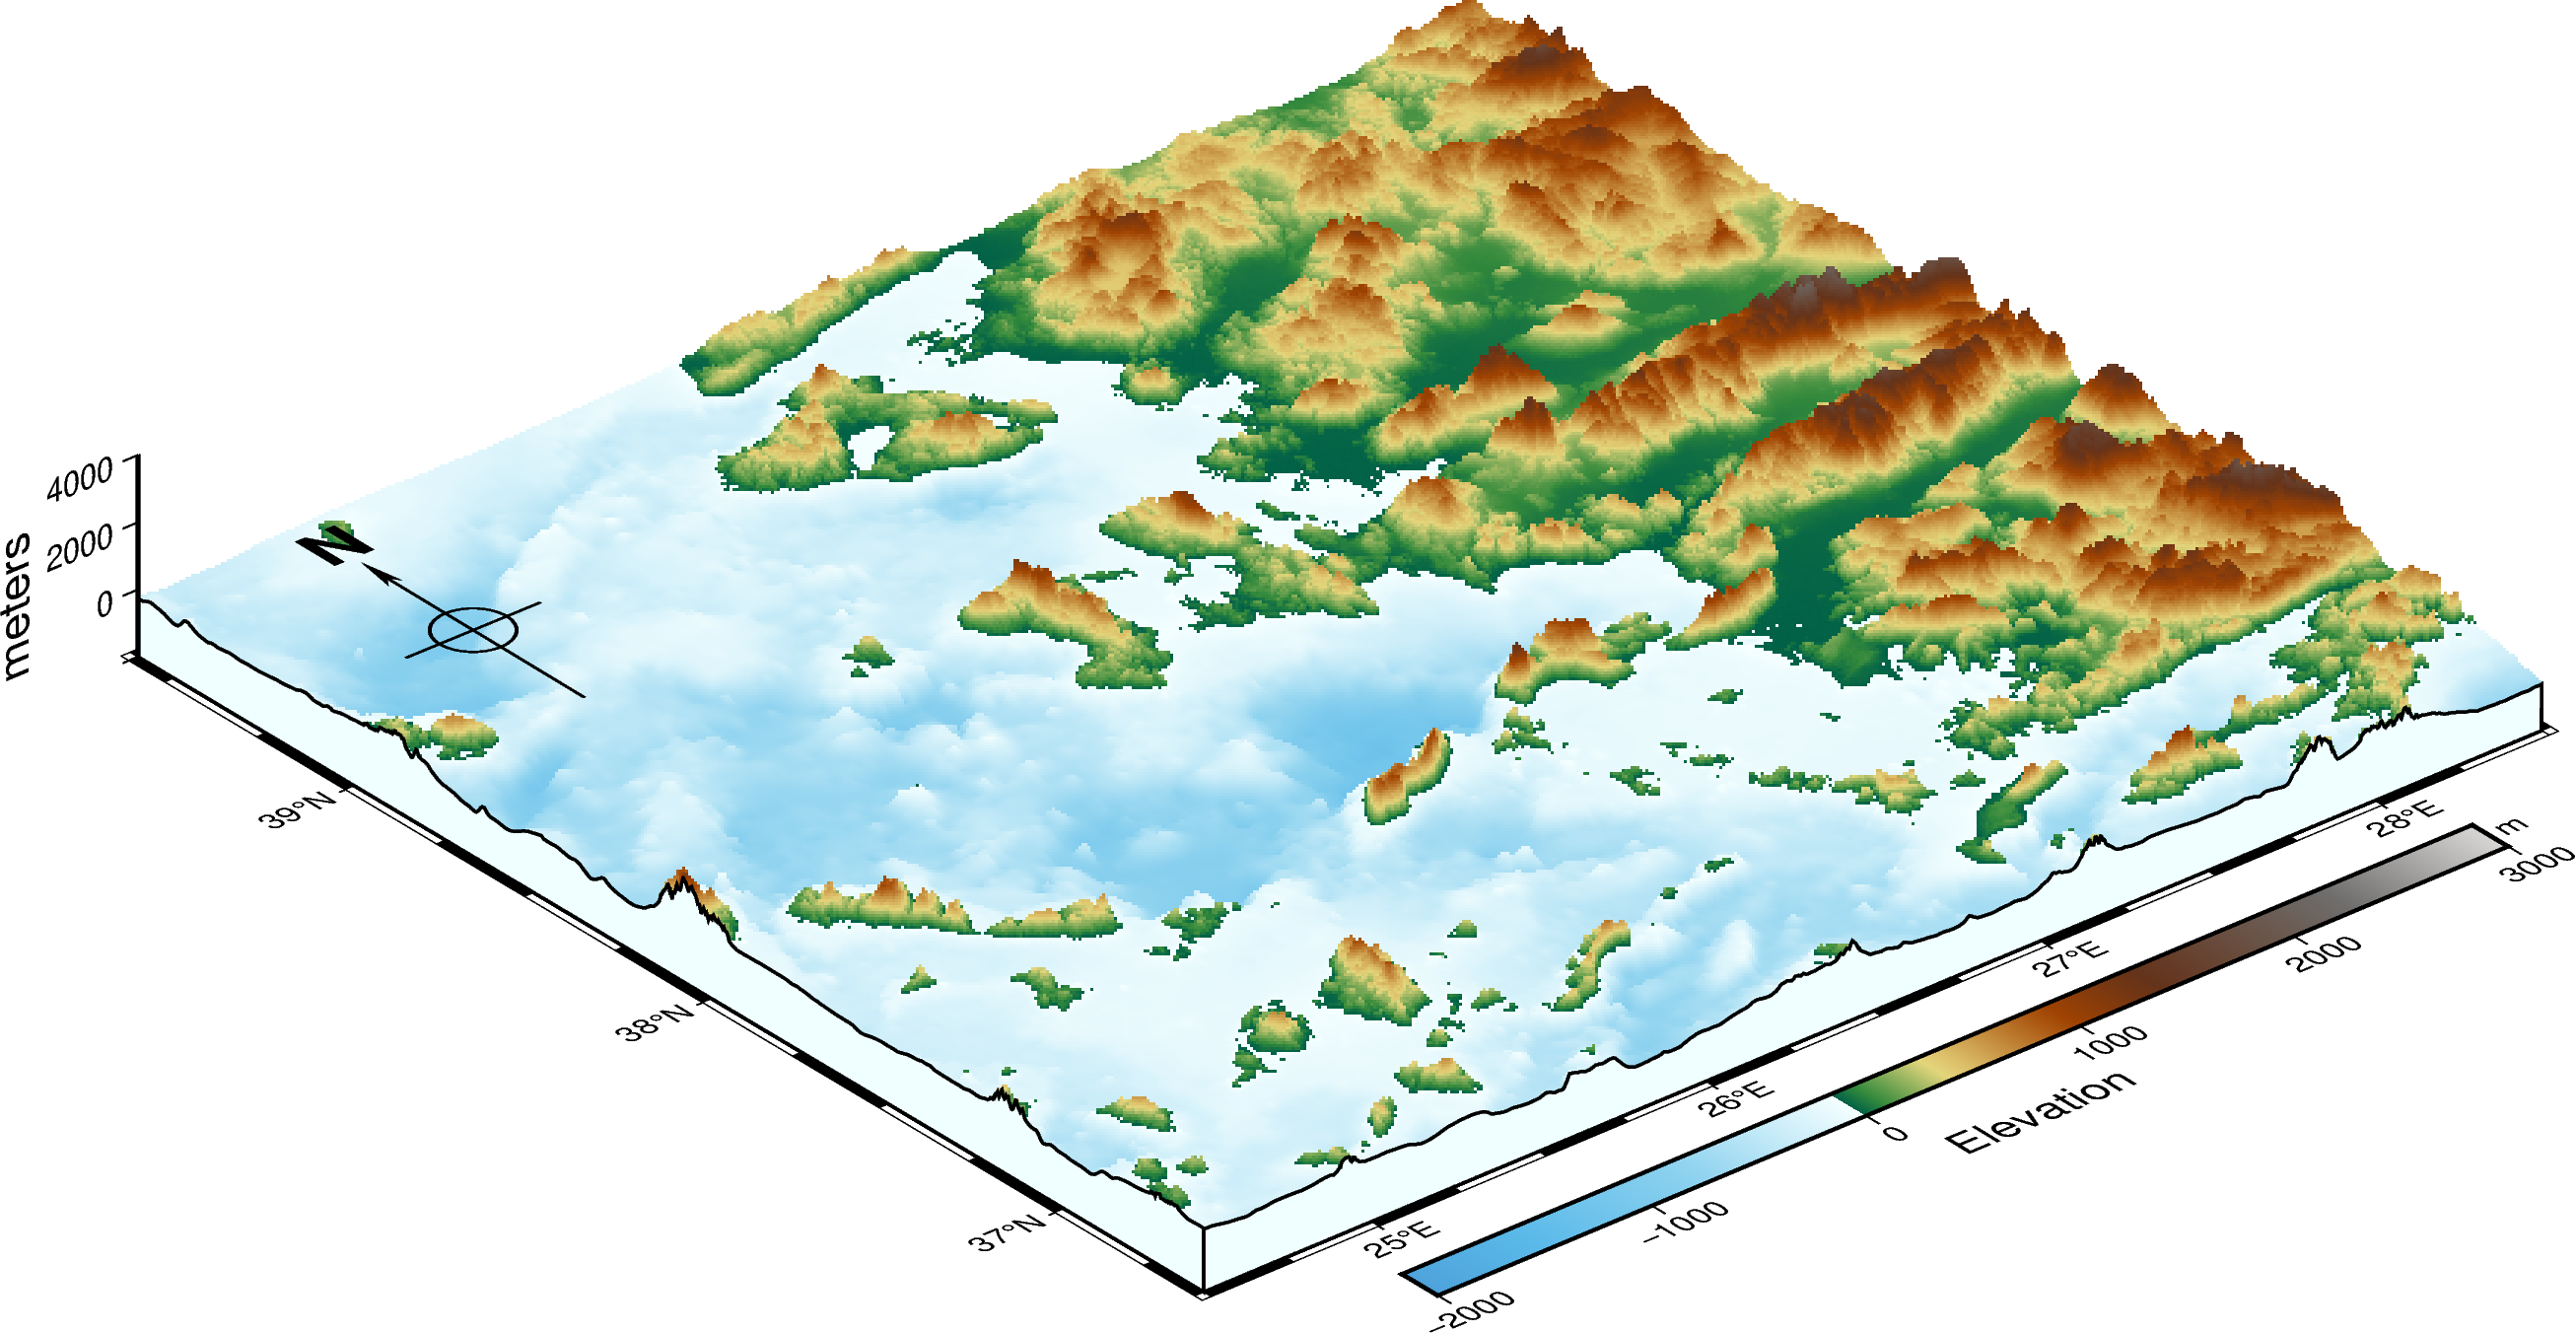

In [71]:
fig.show()

In [72]:
fig.savefig("output/3DmaptAegeanSea.png", dpi=300)